# In Development
# Comparing with Bright Star Methods 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

from astropy.table import Table, join

In [2]:
%matplotlib inline


In [3]:
from datetime import date
date = date.today().strftime("%d%m%Y")
print(f'Today is: {date}')

Today is: 28092022


## The Dataset

Basically, we query the WCS solution from the bulter calibrate task, the boresight pointing position and some information from the exposure metadata. The sample was queried using the script `query_pointing_bluter_reviewed.py`.

The main quantities of this dataset are:
- `RA`, `DEC` : pointing sky position from the boersight
- `RA_WCS`, `DEC_WCS` : pointing sky position from the wcs solutions
- `PNT_OFFSET`: angular distance between the two pointings.

The other columns are exclusively from the metadata and the end with `_MD`: `RA`, `DEC`,`MJD`,`EXPTIME`,`TEMP_SET`,`CCDTEMP`,`FILTER`,`ELSTART`,`ELEND`,`AZSTART`,`AZEND`

The file `data/rev_checking_auxtel_pointing_{date}.csv` contains info about 1421 exposures taken from Feb 2020 up to Nov 2021. The collection used to generate this file was `u/mfl/testProcessCcd_srcMatchFull_181e6356`. And it's from the `lsst.rapid.analysis.butlerUtils`.

<br>
 <font size="4"> <b> Caveat: </b> Not all the images from the observation nights. The calibration filters exposures selecting preferentially crowded fields.</font> 

# The Telescope Pointing

In [4]:
month = 'May2022'
title = 'May 2022'

In [66]:
import pandas as pd

df = pd.read_csv('data/checking_auxtel_pointing_May2022.csv',index_col=0)
# df1 = pd.read_csv('data/rev_checking_auxtel_pointing_Feb2022.csv',index_col=0)
# df2 = pd.read_csv('data/rev_checking_auxtel_pointing_Mar2022.csv',index_col=0)
# df3 = pd.read_csv('data/2022_Apr.csv',index_col=0)
df = pd.read_csv('data/2022_May_partial03.csv',index_col=0)

# df = pd.concat([df1,df2,df3,df4])
df.DATE = pd.to_datetime(df.DATE)#.dt.date

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df[cols].copy()

In [67]:
df.columns

Index(['DATE', 'MJD', 'EXPTIME', 'RA', 'DEC', 'AIRMASS', 'ROT_ANGLE', 'AZ',
       'EL', 'RA_MD', 'DEC_MD', 'EXPTIME_MD', 'TEMP_SET_MD', 'CCDTEMP_MD',
       'FILTER_MD', 'ELSTART_MD', 'ELEND_MD', 'AZSTART_MD', 'AZEND_MD',
       'RA_WCS', 'DEC_WCS', 'dRA', 'dDEC', 'dAZ', 'dEL', 'PNT_OFFSET'],
      dtype='object')

In [88]:
df['seq'] = df.index.to_numpy()-2022050300243

In [89]:
df.seq.min()

15

## Plots

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
sns.set_context('talk', font_scale=0.9)

In [103]:
exposures_high_el = df.seq.iloc[np.where(df.EL>60)[0]].to_numpy()
imin, imax = exposures_high_el[0], exposures_high_el[-1]
print(imin, imax)

218 615


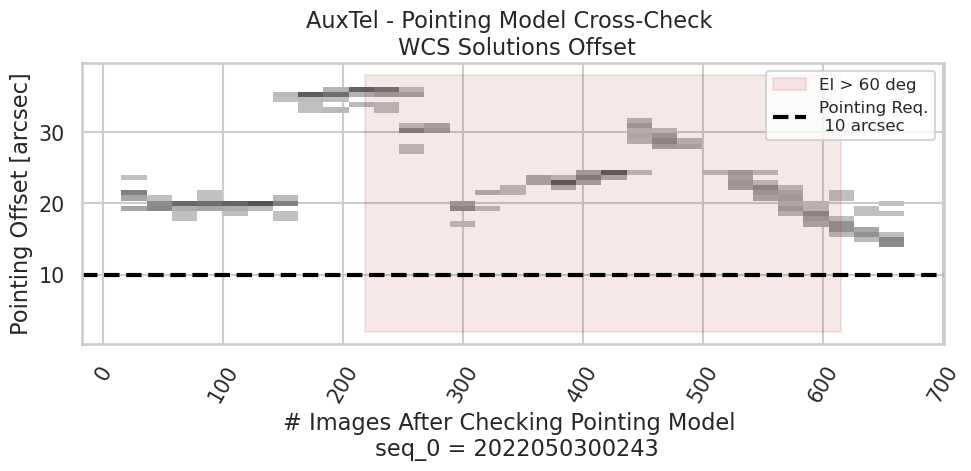

In [112]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq, y=df.PNT_OFFSET*60, color="black", data=df, bins=31)
ax.fill_between([imin, imax], 2, 38, color='firebrick', alpha=0.1, label='El > 60 deg')

ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/pointing_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

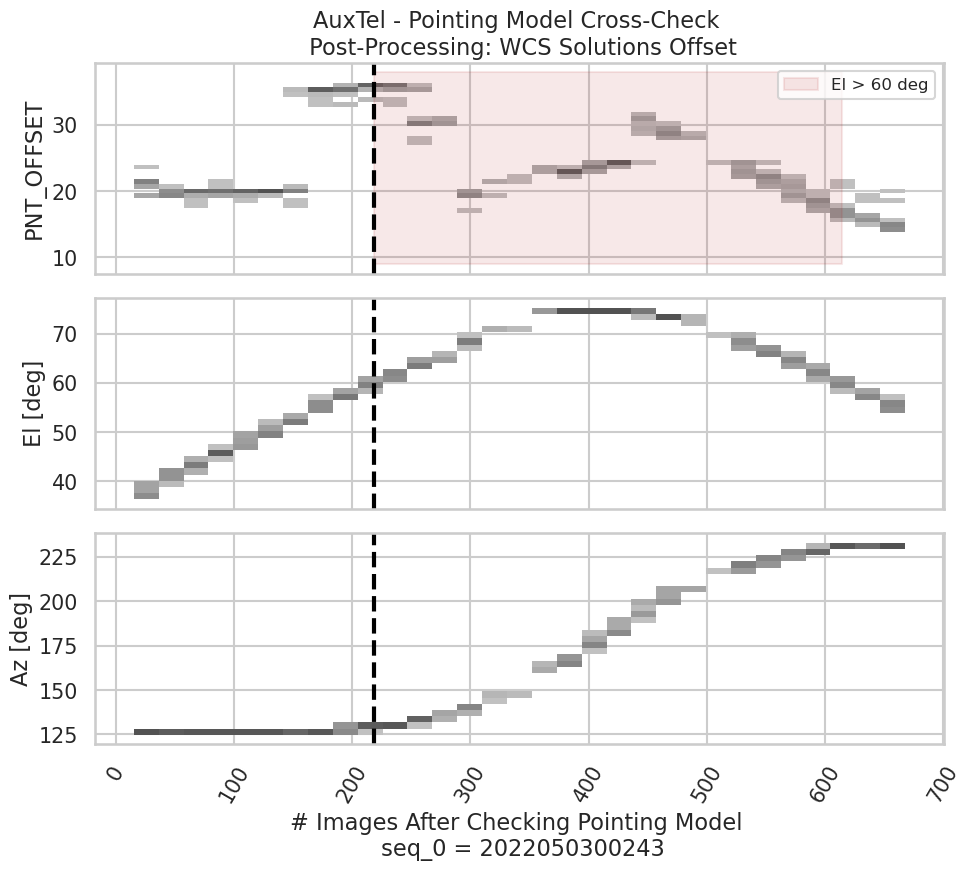

In [141]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex='all')
fig.subplots_adjust()

ax = sns.histplot(x=df.seq, y=df.PNT_OFFSET*60, color="black", data=df, bins=31, ax=axs[0])
ax.fill_between([imin, imax], 9, 38, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.legend(fontsize=12)
ax.set_title('AuxTel - Pointing Model Cross-Check \n Post-Processing: WCS Solutions Offset')

ax = sns.histplot(x=df.seq, y=df.EL, color="black", data=df, bins=31, ax=axs[1])
# ax.fill_between([imin, imax], 5, -35, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.set_xlabel('')
ax.set_ylabel('El [deg]')

ax = sns.histplot(x=df.seq, y=df.AZ, color="black", data=df, bins=31, ax=axs[2])
# ax.fill_between([imin, imax], -40, 48, color='firebrick', alpha=0.1, label='El > 60 deg')
# ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.axvline(imin, color='k',ls='--',lw=3)
ax.set_ylabel('Az [deg]')

ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/EL_AZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

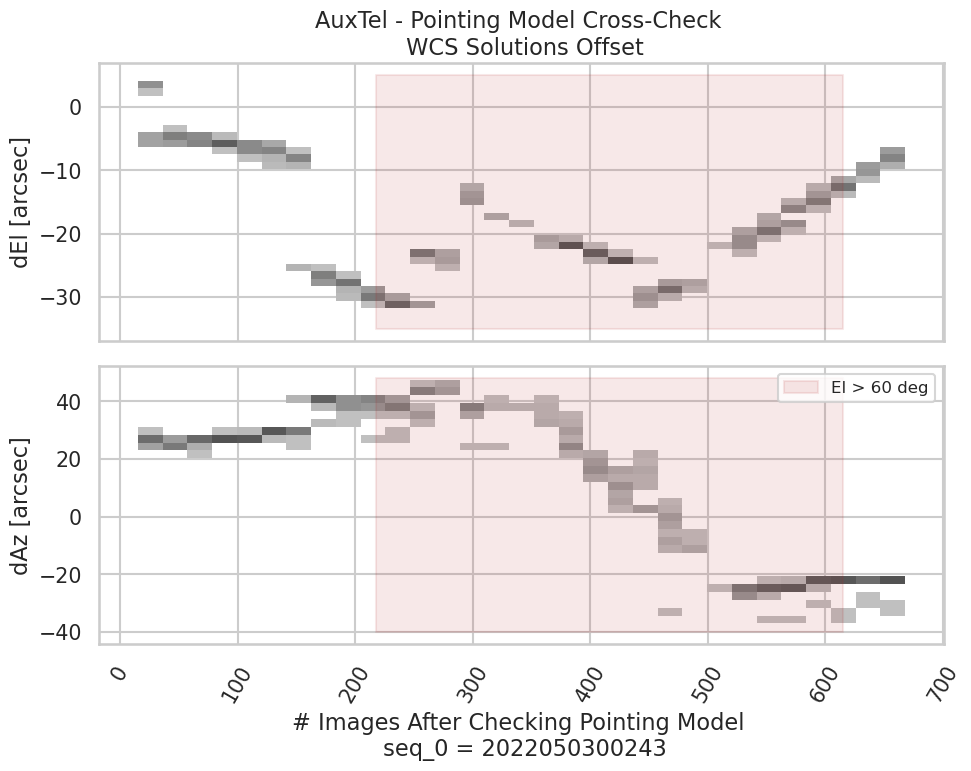

In [129]:
# fig.autofmt_xdate(rotation=45)
fig, axs = plt.subplots(2,1,figsize=(10,8),sharex='all')

ax = sns.histplot(x=df.seq, y=df.dEL*60, color="black", data=df, bins=31, ax=axs[0])
ax.fill_between([imin, imax], 5, -35, color='firebrick', alpha=0.1, label='El > 60 deg')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.set_xlabel('')
ax.set_ylabel('dEl [arcsec]')

ax = sns.histplot(x=df.seq, y=df.dAZ*60, color="black", data=df, bins=31, ax=axs[1])
ax.fill_between([imin, imax], -40, 48, color='firebrick', alpha=0.1, label='El > 60 deg')
# ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('dAz [arcsec]')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/dEl_dAZ_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

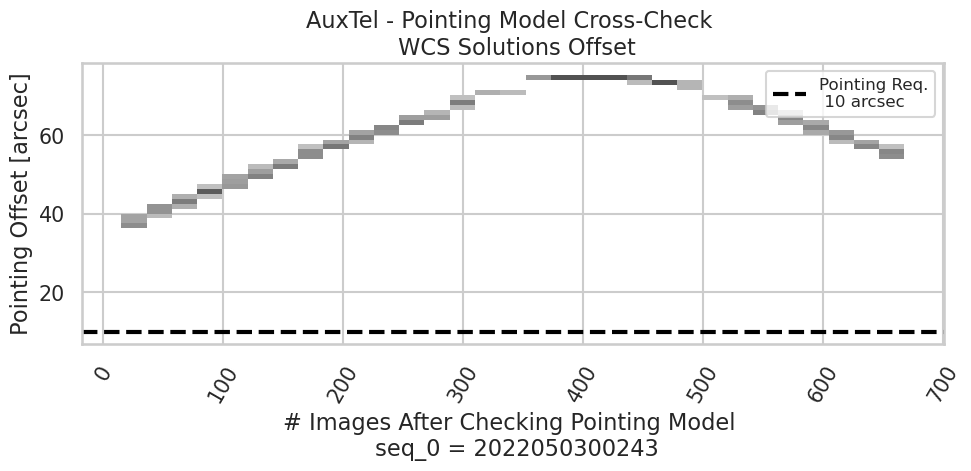

In [110]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq, y=df.EL, color="black", data=df, bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/elevation_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)

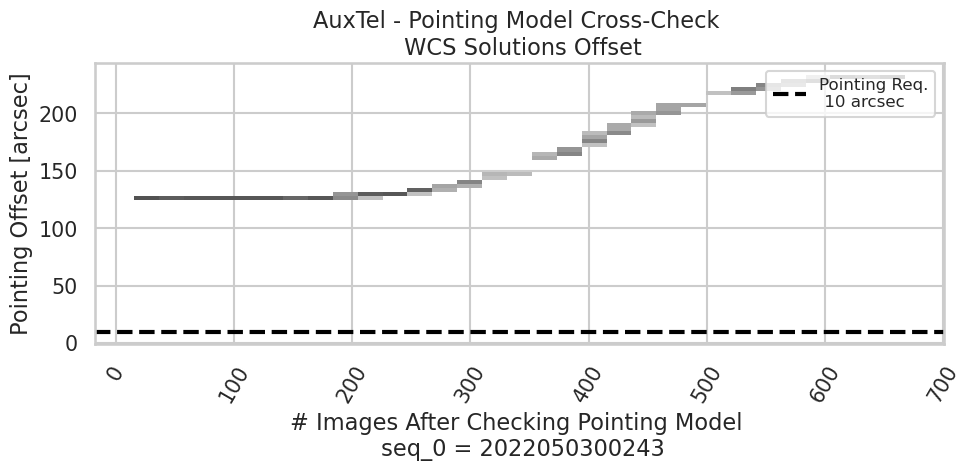

In [111]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x=df.seq, y=df.AZ, color="black", data=df, bins=31)
ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel - Pointing Model Cross-Check \n WCS Solutions Offset')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel('# Images After Checking Pointing Model \n seq_0 = 2022050300243')
fig.tight_layout()
fig.savefig(f'figures/az_offset_seq_after_correction.png',facecolor='w',transparent=False,dpi=100)